In [1]:
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2
from rankingFairness.src.experimentMultipleGroups import simpleOfflineMultipleGroups, MARKERS, COLORMAP
from rankingFairness.src.tradeoffMultipleGroups import computeiDCG
from rankingFairness.src.utils import set_seed
from rankingFairness.src.plot.main_figs import plot_synthetic
from rankingFairness.src.rankingsMultipleGroups import PRP_Ranker, EO_Ranker, TS_RankerII, DP_Ranker, Uniform_Ranker, epiRAnker, exposure, exposure_DP
from rankingFairness.src.distributions import Bernoulli, BetaBernoulli

In [3]:
SEED=42
set_seed(SEED)

## specify probabilities of groups $P(r_i|D)$


In [4]:
#Input calibrated P(r_i|D)
A_calibratedProb = [0.9, 0.9, 0.8, 0.7, 0.1]+ [0.05]*12
B_calibratedProb = [0.6, 0.6, 0.6, 0.5, 0.5, 0.4, 0.4, 0.4]

## specify the ranking Algorithms for computing ranking

In [5]:
rankingAlgos=[EO_Ranker, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker]

### Execute the below cell 

In [6]:
size_A= len(A_calibratedProb)

size_B= len(B_calibratedProb)

n_A=sum(A_calibratedProb)
n_B=sum(B_calibratedProb)

A_dist = [Bernoulli(p) for p in A_calibratedProb]
B_dist = [Bernoulli(p) for p in B_calibratedProb]

num_docs=len(A_calibratedProb)+len(B_calibratedProb)
exp = simpleOfflineMultipleGroups(num_groups=2, num_docs=num_docs, verbose=False, plot=False,
                    predfined_ls=[A_dist, B_dist], distType=BetaBernoulli)
exp.experiment(rankingAlgos=rankingAlgos,
               simulations=100)

cost_groups=exp.cost_groups
EO_constraint=exp.EO_constraint
total_cost=exp.total_cost

dcg_util=exp.dcgUtil
rel = np.hstack((A_calibratedProb, B_calibratedProb))
assert rel.shape==(num_docs,)
iDcg = computeiDCG(np.array(rel)) 
nDCG=np.full((len(rankingAlgos), num_docs), 0.0, dtype=float)
for i, r in enumerate(rankingAlgos):
    nDCG[i,:]= np.divide(dcg_util[i,:],iDcg)
delta_max=exp.delta_max

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 7202.01it/s]


## Print the ranking and EOR summary for the above experiment
### Specify top_k below for printing out the values at a specific ranking prefix k

In [7]:
# Input top_k parameter
top_k=4

for i, alg in enumerate(rankingAlgos):
    print(f"\n")
    print(f"{alg.name()} ranking: {exp.ranking[i][0]}")
    print(f"{alg.name()} top-4 eor ranking: {exp.EO_constraint[i,top_k-1]:.2f}")
    Eor_summary = (np.abs(exp.EO_constraint[i,:])).sum()
    print(f"Eor_summary for {alg.name()}: {Eor_summary:.2f}")




EOR ranking: [17  0 18  1 19 20  2 21  3 22  4 23  5  6  7  8  9 10 11 12 24 13 14 15
 16]
EOR top-4 eor ranking: 0.15
Eor_summary for EOR: 1.28


DP ranking: [ 0 17  1  2 18  3  4 19  5  6 20  7  8  9 21 10 11 22 12 13 23 14 15 24
 16]
DP top-4 eor ranking: 0.50
Eor_summary for DP: 6.40


PRP ranking: [ 0  1  2  3 17 18 19 20 21 22 23 24  4  5  6  7  8  9 10 11 12 13 14 15
 16]
PRP top-4 eor ranking: 0.83
Eor_summary for PRP: 5.35


TS ranking: [ 0 11 17  2 21 18 19  1  3  9  4  5 13  8 20 22 10 24 16 15 12  6 14  7
 23]
TS top-4 eor ranking: 0.29
Eor_summary for TS: 3.94


Uniform ranking: [18  9 13  5 20  3 16  1 21  4 24 23 15 17 19  2 10  7 11 22  8  6  0 12
 14]
Uniform top-4 eor ranking: -0.11
Eor_summary for Uniform: 3.71


## More ranking Algorithms can be specified as below

In [8]:
rankingAlgos=[EO_Ranker, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, exposure, epiRAnker]

In [9]:
# specify probabilities of groups
A_calibratedProb = [0.9, 0.9, 0.8, 0.7, 0.1]+ [0.05]*12
B_calibratedProb = [0.6, 0.6, 0.6, 0.5, 0.5, 0.4, 0.4, 0.4]

size_A= len(A_calibratedProb)

size_B= len(B_calibratedProb)

n_A=sum(A_calibratedProb)
n_B=sum(B_calibratedProb)

A_dist = [Bernoulli(p) for p in A_calibratedProb]
B_dist = [Bernoulli(p) for p in B_calibratedProb]

num_docs=len(A_calibratedProb)+len(B_calibratedProb)
exp = simpleOfflineMultipleGroups(num_groups=2, num_docs=num_docs, verbose=False, plot=False,
                    predfined_ls=[A_dist, B_dist], distType=BetaBernoulli)
exp.experiment(rankingAlgos=rankingAlgos,
               simulations=100)

cost_groups=exp.cost_groups
EO_constraint=exp.EO_constraint
total_cost=exp.total_cost

dcg_util=exp.dcgUtil
rel = np.hstack((A_calibratedProb, B_calibratedProb))
assert rel.shape==(num_docs,)
iDcg = computeiDCG(np.array(rel)) 
nDCG=np.full((len(rankingAlgos), num_docs), 0.0, dtype=float)
for i, r in enumerate(rankingAlgos):
    nDCG[i,:]= np.divide(dcg_util[i,:],iDcg)
delta_max=exp.delta_max

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 7424.20it/s]


In [10]:
# The EXP baseline returns a doubly stochastic ranking matrix, which is used to compute expected cost and dcg,
# so we skip sampling a ranking from that baseline 

# Specify top_k below for printing out the values at a specific ranking prefix k
top_k=4

for i, alg in enumerate(rankingAlgos[:5]):
    print(f"\n")
    print(f"{alg.name()} ranking: {exp.ranking[i][0]}")
    print(f"{alg.name()} top-4 eor ranking: {exp.EO_constraint[i,top_k-1]:.2f}")
    Eor_summary = (np.abs(exp.EO_constraint[i,:])).sum()
    print(f"Eor_summary for {alg.name()}: {Eor_summary:.2f}")
print(f"\n EXP top-4 eor ranking: {exp.EO_constraint[5, top_k-1]:.2f}")
print(f"Eor_summary for EXP: {(np.abs(exp.EO_constraint[5,:])).sum():.2f}")
for alg in rankingAlgos[6:]:
    i=6
    print(f"\n")
    print(f"{alg.name()} ranking: {exp.ranking[i][0]}")
    print(f"{alg.name()} top-4 eor ranking: {exp.EO_constraint[i,top_k-1]:.2f}")
    Eor_summary = (np.abs(exp.EO_constraint[i,:])).sum()
    print(f"Eor_summary for {alg.name()}: {Eor_summary:.2f}")
    i+=1



EOR ranking: [17  0 18  1 19 20  2 21  3 22  4 23  5  6  7  8  9 10 11 12 24 13 14 15
 16]
EOR top-4 eor ranking: 0.15
Eor_summary for EOR: 1.28


DP ranking: [ 0 17  1  2 18  3  4 19  5  6 20  7  8  9 21 10 11 22 12 13 23 14 15 24
 16]
DP top-4 eor ranking: 0.50
Eor_summary for DP: 6.40


PRP ranking: [ 0  1  2  3 17 18 19 20 21 22 23 24  4  5  6  7  8  9 10 11 12 13 14 15
 16]
PRP top-4 eor ranking: 0.83
Eor_summary for PRP: 5.35


TS ranking: [ 0 11 17  2 21 18 19  1  3  9  4  5 13  8 20 22 10 24 16 15 12  6 14  7
 23]
TS top-4 eor ranking: 0.29
Eor_summary for TS: 3.94


Uniform ranking: [18  9 13  5 20  3 16  1 21  4 24 23 15 17 19  2 10  7 11 22  8  6  0 12
 14]
Uniform top-4 eor ranking: -0.11
Eor_summary for Uniform: 3.71

 EXP top-4 eor ranking: -0.57
Eor_summary for EXP: 7.44


RA ranking: [ 0  1  2  3 17 18 19 20 21 22 23 24  4  5  6  7  8  9 10 11 12 13 14 15
 16]
RA top-4 eor ranking: 0.83
Eor_summary for RA: 5.35


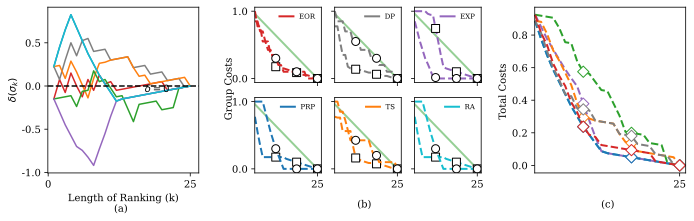

In [11]:
save_path=None
filename=None
rankingAlgosName=[r.name() for r in rankingAlgos]
rankingAlgos_dict={'EOR':0,
                   'DP':1, 
                   'PRP':2, 
                   'TS':3, 
                   'Uniform':4,
                  'EXP':5,
                  'RA':6,
                  }
SynthMarker_dict={'Group A': MARKERS[0],
                  'Group B': MARKERS[1],
                  'Principal': MARKERS[4],}


num_docs=total_cost.shape[-1]
fig_kw={}
fig_kw['markevery']=(int(num_docs/3),int(num_docs/3))
fig_kw['linewidth']=2
fig_kw['markersize']=8
fig_kw['markeredgecolor']='black'
fig_kw['ticklabelsize']=10
fig_kw['yLabelSize']=10
fig_kw['alpha_stochastic']=0.5
fig_kw['offset']=0.06

fig_kw['nrows']=1
fig_kw['ncols']=1
fig_kw['interval_y']=0.5
fig_kw['hspace']=0.025
fig_kw['wspace']=0.025
fig_kw['rasterized']=False
fig_kw['labelpad']=15

# For plotting dcg,  uncomment the below three lines and comment the three lines after

# dcg_option=True
# dcg=dcg_util
# fig_kw['figsize']=(16,5)

fig_kw['figsize']=(9.5,3)
dcg=None
dcg_option=False


plot_synthetic(EO_constraint, cost_groups, total_cost, rankingAlgos, rankingAlgos_dict, SynthMarker_dict,
    save_path, filename, fig_kw, dcg_option=dcg_option, dcg=dcg)